## Գրադարանների ներմուծում

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

## Վերլուծություն

In [2]:
# կարդում ենք csv ֆայլը
df = pd.read_csv("water_potability.csv")

In [3]:
columns_list = df.columns.tolist()
print("Սյուների անուններ: ")
print(columns_list)

Սյուների անուններ: 
['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']


In [4]:
#Տվյալների առաջին 5 տողեր
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Հասկանանք տվյալները
* Potability = 0, խմելու պիտանի չէ,
* Potability = 1, պիտանի է։

In [5]:
print(df.shape)

(3276, 10)


In [6]:
print("Կան", df.shape[0], "տողեր և", df.shape[1], "սյուներ տրված տվյալների հավաքածուում։")

Կան 3276 տողեր և 10 սյուներ տրված տվյալների հավաքածուում։


In [7]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [8]:
# կրկնօրինակների ստուգում
duplicate_rows = df[df.duplicated()]
print("կրկնօրինակ տողեր: ")
print(duplicate_rows)

կրկնօրինակ տողեր: 
Empty DataFrame
Columns: [ph, Hardness, Solids, Chloramines, Sulfate, Conductivity, Organic_carbon, Trihalomethanes, Turbidity, Potability]
Index: []


## Detecting Missing Values

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


Կան բացթողումներով սյուներ

In [10]:
 df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [11]:
# Հաշվենք բացթողնված արժեքների տոկոսը
percentage_missing = df.isna().sum() / len(df) * 100
print("Բացթողնված տվյալների քանակ տոկոսներով: ")
print(percentage_missing)

Բացթողնված տվյալների քանակ տոկոսներով: 
ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64


<Axes: >

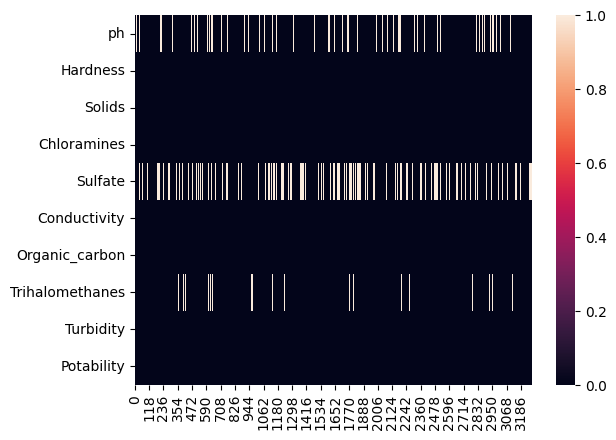

In [12]:
sns.heatmap(df.isna().transpose())

## Handling Missing Values

#### Նախկինում ներկայացված ջերմային քարտեզի դիտարկումից պարզվում է, որ երեք սյունակներ պարունակում են բացակայող արժեքներ՝ pH, սուլֆատներ և տրիալոմեթաններ: Որոշ սյունակներում բացակայող արժեքների հայտնաբերումը հանգեցնում է էքստրեմալ արժեքների (outliers) ուսումնասիրության անհրաժեշտությանը, քանի որ վերջիններս կարող են էական ազդեցություն ունենալ տվյալների վերլուծության վրա:

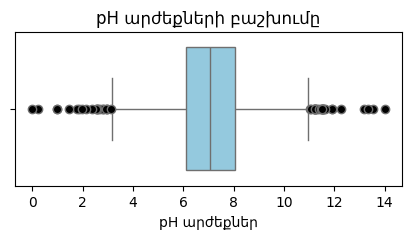

In [13]:
plt.figure(figsize=(5,2))
sns.boxplot(x = "ph", data = df, color = "skyblue", flierprops = dict(markersize = 6, markerfacecolor = "black"))
plt.xlabel("pH արժեքներ")
plt.title("pH արժեքների բաշխումը")
plt.show()

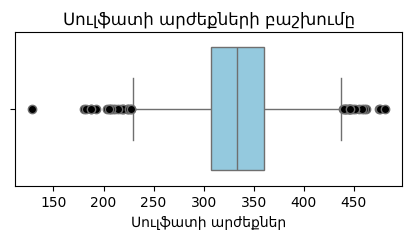

In [14]:
#Checking for outliers in sulfate column
plt.figure(figsize=(5,2))
sns.boxplot(x = "Sulfate", data = df, color = "skyblue", flierprops = dict(markersize = 6, markerfacecolor = "black"))
plt.xlabel("Սուլֆատի արժեքներ")
plt.title("Սուլֆատի արժեքների բաշխումը")
plt.show()

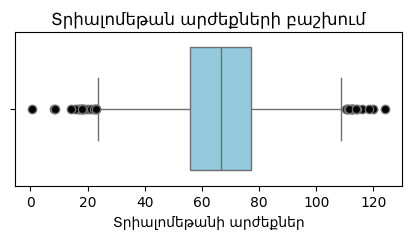

In [15]:
#Checking for outliers in Trihalomethanes column
plt.figure(figsize=(5,2))
sns.boxplot(x = "Trihalomethanes", data = df, color = "skyblue", flierprops = dict(markersize = 6, markerfacecolor = "black"))
plt.xlabel("Տրիալոմեթանի արժեքներ")
plt.title("Տրիալոմեթան արժեքների բաշխում")
plt.show()

In [16]:
skew_values = df.skew()
print("Յուրաքանչյուր սյան թեքություն")
print(skew_values)

Յուրաքանչյուր սյան թեքություն
ph                 0.025630
Hardness          -0.039342
Solids             0.621634
Chloramines       -0.012098
Sulfate           -0.035947
Conductivity       0.264490
Organic_carbon     0.025533
Trihalomethanes   -0.083031
Turbidity         -0.007817
Potability         0.450784
dtype: float64


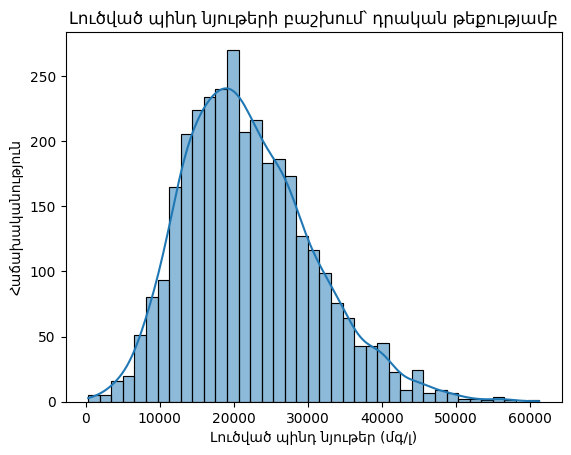

In [17]:
sns.histplot(x = "Solids", data = df, kde = True)
plt.xlabel("Լուծված պինդ նյութեր (մգ/լ)")
plt.ylabel("Հաճախականություն")
plt.title("Լուծված պինդ նյութերի բաշխում՝ դրական թեքությամբ")
plt.show()

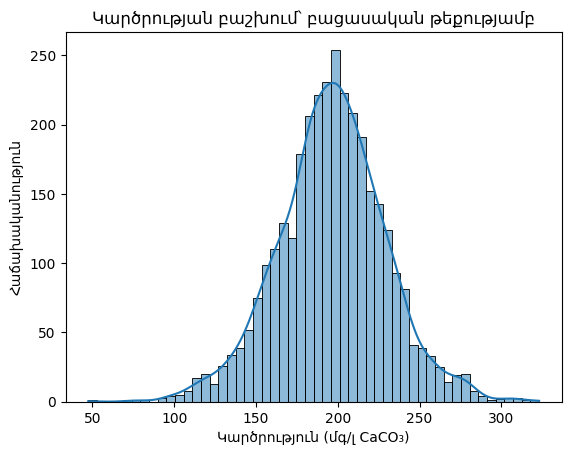

In [18]:
sns.histplot(x = "Hardness", data = df, kde = True)
plt.xlabel("Կարծրություն (մգ/լ CaCO₃)")
plt.ylabel("Հաճախականություն")
plt.title("Կարծրության բաշխում՝ բացասական թեքությամբ")
plt.show()

In [19]:
median_value1 = df["ph"].median()
median_value2 = df["Sulfate"].median()
median_value3 = df["Trihalomethanes"].median()

In [20]:
df["ph"].fillna(median_value1, inplace = True)
df["Sulfate"].fillna(median_value2, inplace = True)
df["Trihalomethanes"].fillna(median_value3, inplace = True)

In [21]:
# ստուգենք բացթողնված տվյալների քանակը
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

## Թիրախային Փոփոխական

In [22]:

potential_target = [col for col in columns_list if col not in ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
target_variable = potential_target[0]  

print("Թիրախային փոփոխական:", target_variable)

Թիրախային փոփոխական: Potability


In [23]:
df["Potability"].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

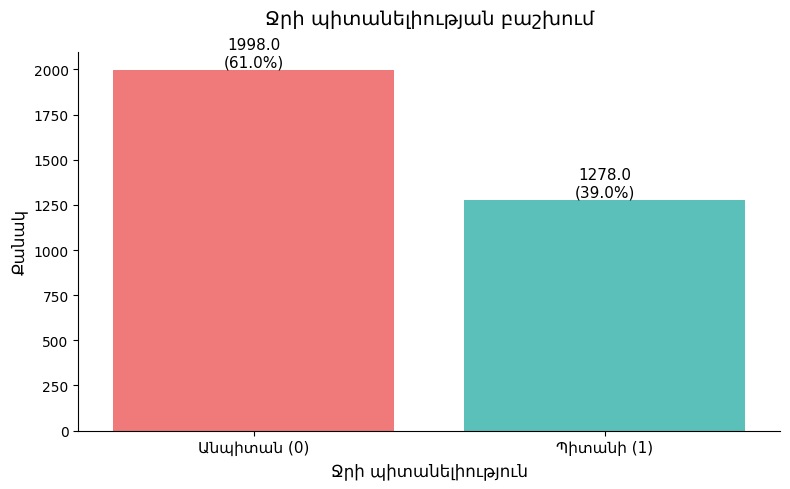

In [24]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x="Potability", data=df, 
                  palette=["#FF6B6B", "#4ECDC4"],  # Կարմիր և փիրուզագույն
                  saturation=0.8)  # Գույների հագեցվածություն

# Ավելացնել վերնագիր և առանցքների պիտակներ
plt.title("Ջրի պիտանելիության բաշխում", fontsize=14, pad=20)
plt.xlabel("Ջրի պիտանելիություն", fontsize=12)
plt.ylabel("Քանակ", fontsize=12)

# Փոխել x-առանցքի պիտակները
ax.set_xticklabels(['Անպիտան (0)', 'Պիտանի (1)'], fontsize=11)

# Ավելացնել տոկոսային արժեքներ սյուների վրա
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 20,
            f'{height}\n({height/total*100:.1f}%)',
            ha='center', fontsize=11)

# Հեռացնել վերևի և աջ եզրերը
sns.despine(top=True, right=True)

plt.tight_layout()
plt.show()

In [25]:
df.groupby("Potability").mean()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
Potability,,,,,,,,,
0,7.077736,196.733292,21777.490788,7.092175,334.200184,426.730454,14.364335,66.320635,3.965800
1,7.068655,195.800744,22383.991018,7.169338,332.683125,425.383800,14.160893,66.543247,3.968328


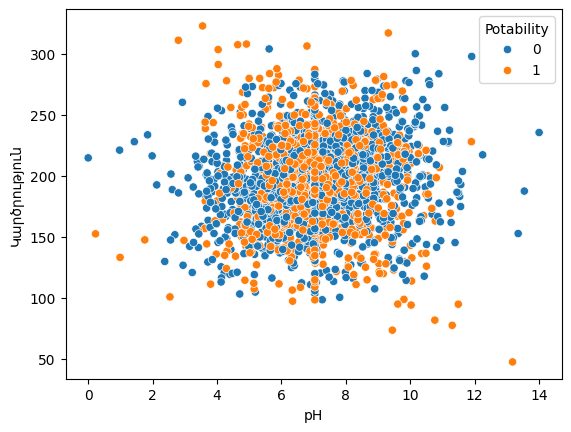

In [26]:
# Creating a scatter plot to explore the relationship between "ph" and "Hardness"
sns.scatterplot(x = "ph", y = "Hardness", data = df,hue="Potability")
plt.xlabel("pH")
plt.ylabel("Կարծրություն")
plt.show()

In [27]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075760,-0.082004,-0.031741,0.014178,0.017466,0.040240,0.003145,-0.036107,-0.003014
Hardness,0.075760,1.000000,-0.046899,-0.030054,-0.092833,-0.023915,0.003610,-0.012707,-0.014449,-0.013837
Solids,-0.082004,-0.046899,1.000000,-0.070148,-0.149747,0.013831,0.010242,-0.008799,0.019546,0.033743
Chloramines,-0.031741,-0.030054,-0.070148,1.000000,0.023762,-0.020486,-0.012653,0.016614,0.002363,0.023779
Sulfate,0.014178,-0.092833,-0.149747,0.023762,1.000000,-0.014182,0.027102,-0.025657,-0.009767,-0.020476
Conductivity,0.017466,-0.023915,0.013831,-0.020486,-0.014182,1.000000,0.020966,0.001184,0.005798,-0.008128
Organic_carbon,0.040240,0.003610,0.010242,-0.012653,0.027102,0.020966,1.000000,-0.012958,-0.027308,-0.030001
Trihalomethanes,0.003145,-0.012707,-0.008799,0.016614,-0.025657,0.001184,-0.012958,1.000000,-0.021487,0.006887
Turbidity,-0.036107,-0.014449,0.019546,0.002363,-0.009767,0.005798,-0.027308,-0.021487,1.000000,0.001581
Potability,-0.003014,-0.013837,0.033743,0.023779,-0.020476,-0.008128,-0.030001,0.006887,0.001581,1.000000


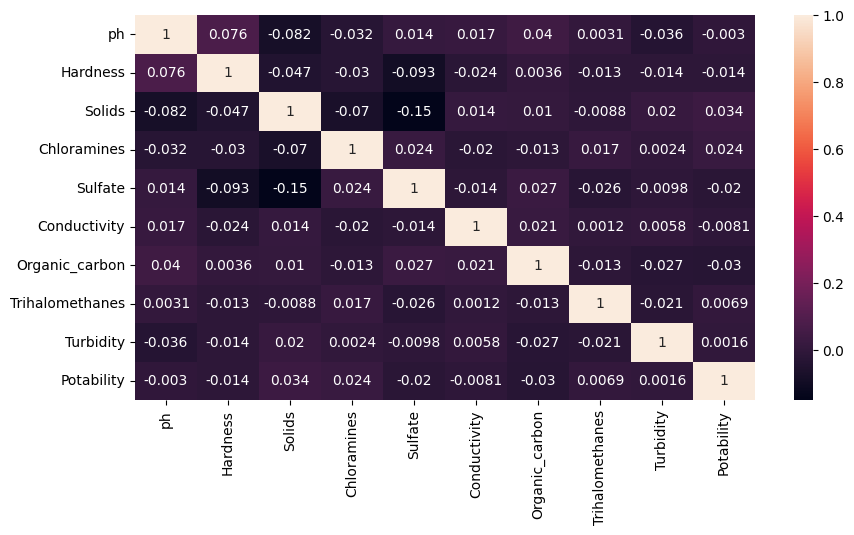

In [28]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot = True)
plt.show()

<Figure size 600x600 with 0 Axes>

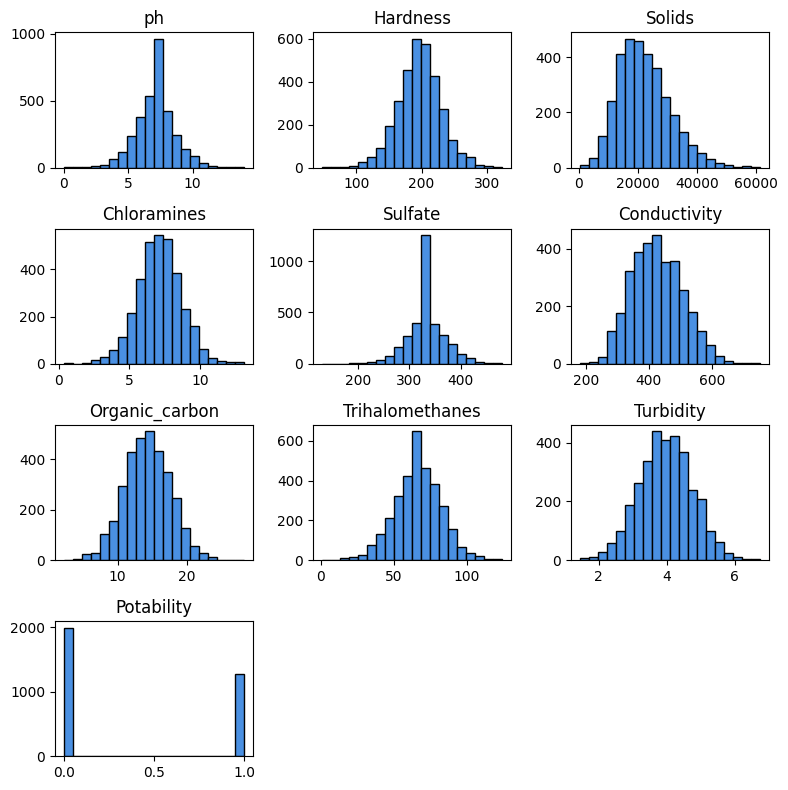

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
df.hist(bins=20, edgecolor='black', color='#4a90e2', grid=False, figsize=(8, 8))
plt.tight_layout()
plt.show()

## Նպատակային և թիրախային փոփոխականների բաժանում


In [30]:
X = df.iloc[:, :9] #անկախ փոփոխական
y = df.Potability #կախյալ փոփոխական

In [31]:
print("կախյալ փոփոխական: ")
print(y)

կախյալ փոփոխական: 
0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64


In [32]:
print("անկախ փոփոխականներ: ")
print(X)

անկախ փոփոխականներ: 
            ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.036752  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  333.073546   
2     8.099124  224.236259  19909.541732     9.275884  333.073546   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  333.073546   
3273  9.419510  175.762646  33155.578218     7.350233  333.073546   
3274  5.126763  230.603758  11983.869376     6.303357  333.073546   
3275  7.874671  195.102299  17404.177061     7.509306  333.073546   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
0       564.308654       10.379783        86.990970   2.963135  
1       592.885359  

## Նպատակային փոփոխականների նորմալացում

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X)

[[-2.54735465e-02  2.59194711e-01 -1.39470871e-01 ... -1.18065057e+00
   1.30543373e+00 -1.28629758e+00]
 [-2.28471739e+00 -2.03641367e+00 -3.85986650e-01 ...  2.70597240e-01
  -6.39186284e-01  6.84217891e-01]
 [ 6.97319183e-01  8.47664833e-01 -2.40047337e-01 ...  7.81116857e-01
   8.00012586e-04 -1.16736546e+00]
 ...
 [ 1.59565368e+00 -6.26829230e-01  1.27080989e+00 ... -9.81329234e-01
   2.18037800e-01 -8.56006782e-01]
 [-1.32494885e+00  1.04135450e+00 -1.14405809e+00 ... -9.42063817e-01
   7.02755628e-01  9.50797383e-01]
 [ 5.44611034e-01 -3.85462310e-02 -5.25811937e-01 ...  5.60940070e-01
   7.79510303e-01 -2.12445866e+00]]


## Հավաքածուն բաժանում ենք նպատակային և թիրախային փոփոխականների

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, stratify = y, random_state = 40)

In [35]:
X_train.shape

(1638, 9)

In [36]:
X_test.shape

(1638, 9)

## Մոդել 1: Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

# Ստեղծում ենք տրամա
model_reg= LogisticRegression()

# Fitting the model using the training data
model_reg.fit(X_train, y_train)

# Predicting the target variable for the test set using the trained model
y_pred_reg = model_reg.predict(X_test)

In [38]:
from sklearn.metrics import (accuracy_score,
                             f1_score, 
                             precision_score, 
                             recall_score) 

In [39]:
Accuracy = accuracy_score(y_test, y_pred_reg)
print(f"Accuracy Score:{Accuracy}")

f1_score = f1_score(y_true = y_test, y_pred = y_pred_reg)
print(f"f1_score: {f1_score}")

precision = precision_score(y_true = y_test, y_pred = y_pred_reg)
print(f"precision_score: {precision}")

recall = recall_score(y_true = y_test, y_pred = y_pred_reg)
print(f"recall_score: {recall}")

Accuracy Score:0.6105006105006106
f1_score: 0.006230529595015576
precision_score: 0.6666666666666666
recall_score: 0.003129890453834116


In [40]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_reg)

array([[998,   1],
       [637,   2]])

In [41]:
from sklearn.metrics import confusion_matrix
import pandas as pd

cm = confusion_matrix(y_test, y_pred_reg)
cm_df = pd.DataFrame(cm,
                    index=['Փաստացի բացասական', 'Փաստացի դրական'],
                    columns=['Կանխատեսված բացասական', 'Կանխատեսված դրական'])

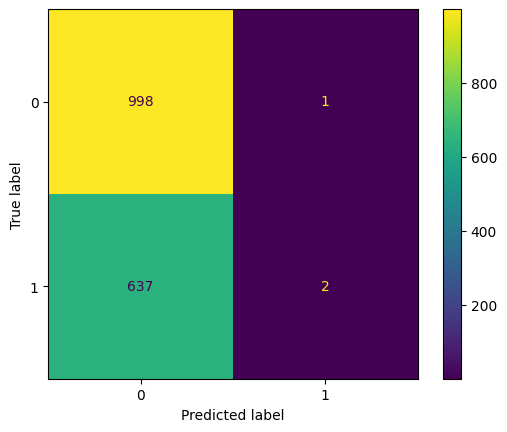

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_reg, labels=model_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model_reg.classes_)
disp.plot()

plt.show()

## Մոդել 2: Decision Tree Classifier


In [43]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(criterion= 'gini', min_samples_split=10, splitter = "best")
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=10)

#### Confusion Matrix and Classification Report


In [45]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
y_pred_dt = model_dt.predict(X_test)
# Մոդելի կանխատեսումների հիման վրա մետրիկների հաշվարկ
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)

# Արդյունքների տպում
print(f"Accuracy: {accuracy:.4f} կամ {accuracy*100:.2f}%")
print(f"Precision: {precision:.4f} կամ {precision*100:.2f}%")
print(f"Recall: {recall:.4f} կամ {recall*100:.2f}%")
print(f"F1 Score: {f1:.4f} կամ {f1*100:.2f}%")

Accuracy: 0.5641 կամ 56.41%
Precision: 0.4415 կամ 44.15%
Recall: 0.4429 կամ 44.29%
F1 Score: 0.4422 կամ 44.22%


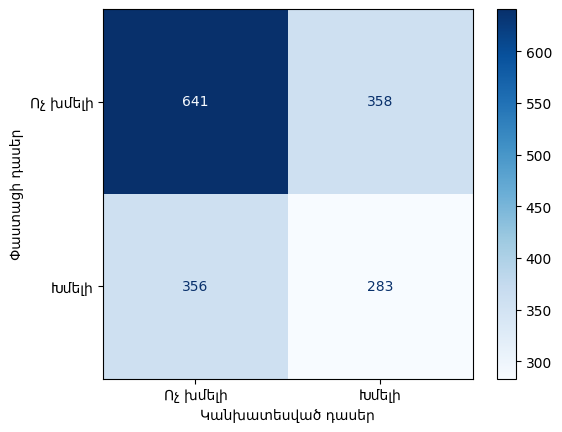

In [46]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Հաշվել confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Ստեղծել գրաֆիկական պատկեր
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt,
                           display_labels=['Ոչ խմելի', 'Խմելի'])
disp.plot(cmap='Blues', values_format='d')  # values_format='d'՝ ամբողջ թվեր ցույց տալու համար
plt.xlabel('Կանխատեսված դասեր')
plt.ylabel('Փաստացի դասեր')

# Պահպանել պատկերը հաշվետվության համար
plt.savefig('dt_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

## Մոդել 3: Random Forest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier

ranfor = RandomForestClassifier()
ranfor.fit(X_train, y_train)

RandomForestClassifier()

Մոդելի գնահատում (%):
Accuracy: 64.41%
Precision: 58.86%
Recall: 29.11%
F1 Score: 38.95%

Classification Report (%):
              precision    recall  f1-score   support

    Ոչ խմելի       0.66      0.87      0.75       999
       Խմելի       0.59      0.29      0.39       639

    accuracy                           0.64      1638
   macro avg       0.62      0.58      0.57      1638
weighted avg       0.63      0.64      0.61      1638



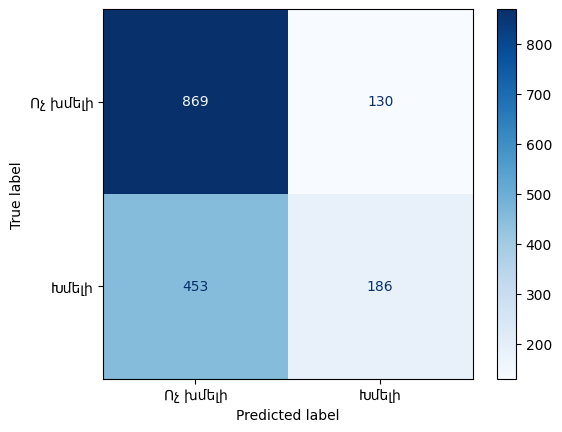

In [48]:
from sklearn.metrics import (accuracy_score, precision_score, 
                           recall_score, f1_score, 
                           confusion_matrix, ConfusionMatrixDisplay,
                           classification_report)
import matplotlib.pyplot as plt

# Մոդելի կանխատեսումներ
y_pred_ranfor = ranfor.predict(X_test)

# 1. Հիմնական մետրիկների հաշվարկ (տոկոսային տեսքով)
print("Մոդելի գնահատում (%):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_ranfor)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_pred_ranfor)*100:.2f}%")
print(f"Recall: {recall_score(y_test, y_pred_ranfor)*100:.2f}%")
print(f"F1 Score: {f1_score(y_test, y_pred_ranfor)*100:.2f}%\n")

# 2. Classification Report (տոկոսային տեսքով)
print("Classification Report (%):")
print(classification_report(y_test, y_pred_ranfor, 
                          target_names=['Ոչ խմելի', 'Խմելի'],
                          output_dict=False, digits=2))

# 3. Confusion Matrix-ի վիզուալիզացիա
cm = confusion_matrix(y_test, y_pred_ranfor)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                            display_labels=['Ոչ խմելի', 'Խմելի'])
disp.plot(cmap='Blues', values_format='d')

plt.savefig('rf_confusion_matrix.png', dpi=300)
plt.show()


## Model 4: KNN

In [49]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

KNN Մոդելի Գնահատում (%):
Accuracy: 60.32%
Precision: 48.88%
Recall: 37.40%
F1 Score: 42.38%

Classification Report (%):
              precision    recall  f1-score   support

    Ոչ խմելի       0.65      0.75      0.70       999
       Խմելի       0.49      0.37      0.42       639

    accuracy                           0.60      1638
   macro avg       0.57      0.56      0.56      1638
weighted avg       0.59      0.60      0.59      1638



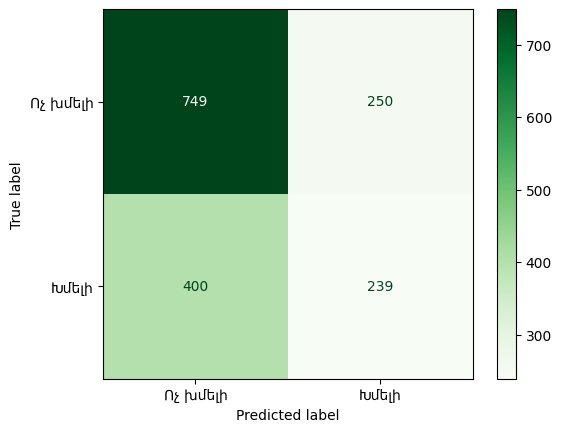

In [50]:
from sklearn.metrics import (accuracy_score, precision_score, 
                           recall_score, f1_score, 
                           confusion_matrix, ConfusionMatrixDisplay,
                           classification_report)
import matplotlib.pyplot as plt

# Մոդելի կանխատեսումներ
y_pred_knn = knn.predict(X_test)

# 1. Հիմնական մետրիկների հաշվարկ (տոկոսային տեսքով)
print("KNN Մոդելի Գնահատում (%):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_pred_knn)*100:.2f}%")
print(f"Recall: {recall_score(y_test, y_pred_knn)*100:.2f}%")
print(f"F1 Score: {f1_score(y_test, y_pred_knn)*100:.2f}%\n")

# 2. Classification Report (տոկոսային տեսքով)
print("Classification Report (%):")
print(classification_report(y_test, y_pred_knn, 
                          target_names=['Ոչ խմելի', 'Խմելի'],
                          output_dict=False, digits=2))

# 3. Confusion Matrix-ի վիզուալիզացիա
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, 
                                display_labels=['Ոչ խմելի', 'Խմելի'])
disp_knn.plot(cmap='Greens', values_format='d')
plt.savefig('knn_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. Հատկանիշների սանդղակում (ըստ անհրաժեշտության)
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)
# knn.fit(X_train_scaled, y_train)

## Model 5: Support Vector Classifier

In [51]:
from sklearn.svm import SVC, LinearSVC

svm = SVC()
svm.fit(X_train, y_train)

SVC()

SVM Մոդելի Գնահատում (%):
Accuracy: 67.77%
Precision: 76.30%
Recall: 25.20%
F1 Score: 37.88%

Classification Report (%):
              precision    recall  f1-score   support

    Ոչ խմելի       0.67      0.95      0.78       999
       Խմելի       0.76      0.25      0.38       639

    accuracy                           0.68      1638
   macro avg       0.71      0.60      0.58      1638
weighted avg       0.70      0.68      0.62      1638



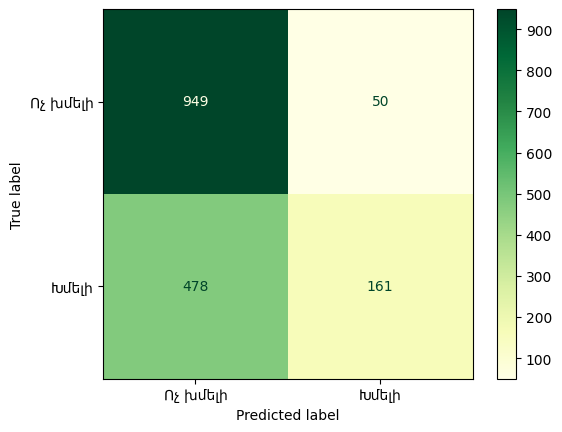


Սանդղակված տվյալներով SVM Արդյունքներ (%):
Accuracy: 67.89%


In [53]:
from sklearn.metrics import (accuracy_score, precision_score, 
                           recall_score, f1_score, 
                           confusion_matrix, ConfusionMatrixDisplay,
                           classification_report)
import matplotlib.pyplot as plt

# Մոդելի կանխատեսումներ
y_pred_svm = svm.predict(X_test)

# 1. Հիմնական մետրիկների հաշվարկ (տոկոսային տեսքով)
print("SVM Մոդելի Գնահատում (%):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_pred_svm)*100:.2f}%")
print(f"Recall: {recall_score(y_test, y_pred_svm)*100:.2f}%")
print(f"F1 Score: {f1_score(y_test, y_pred_svm)*100:.2f}%\n")

# 2. Classification Report (տոկոսային տեսքով)
print("Classification Report (%):")
print(classification_report(y_test, y_pred_svm, 
                          target_names=['Ոչ խմելի', 'Խմելի'],
                          output_dict=False, digits=2))

# 3. Confusion Matrix-ի վիզուալիզացիա
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, 
                                display_labels=['Ոչ խմելի', 'Խմելի'])
disp_svm.plot(cmap='YlGn', values_format='d')
plt.savefig('svm_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. Հատկանիշների սանդղակում (առաջարկվում է SVM-ի համար)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Վերամշակել մոդելը սանդղակված տվյալներով
svm_scaled = SVC()
svm_scaled.fit(X_train_scaled, y_train)
y_pred_svm_scaled = svm_scaled.predict(X_test_scaled)

print("\nՍանդղակված տվյալներով SVM Արդյունքներ (%):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm_scaled)*100:.2f}%")

## Model 6: Naive Bayes 

In [54]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

Naive Bayes Մոդելի Գնահատում (%):
Accuracy: 61.97%
Precision: 53.17%
Recall: 20.97%
F1 Score: 30.08%

Classification Report:
              precision    recall  f1-score   support

    Ոչ խմելի      0.636     0.882     0.739       999
       Խմելի      0.532     0.210     0.301       639

    accuracy                          0.620      1638
   macro avg      0.584     0.546     0.520      1638
weighted avg      0.595     0.620     0.568      1638



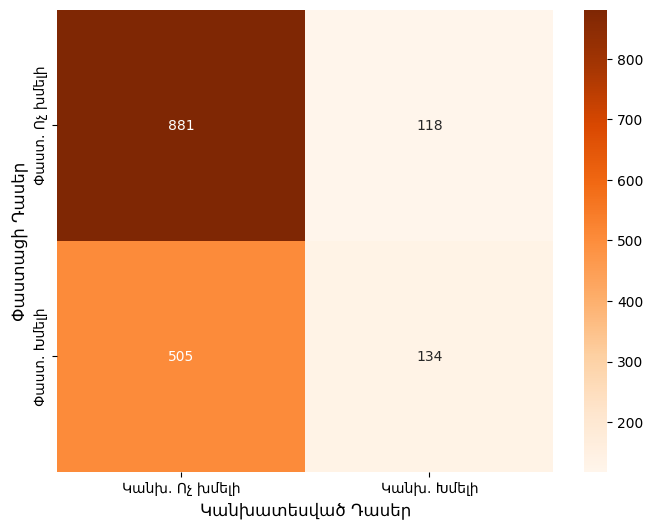

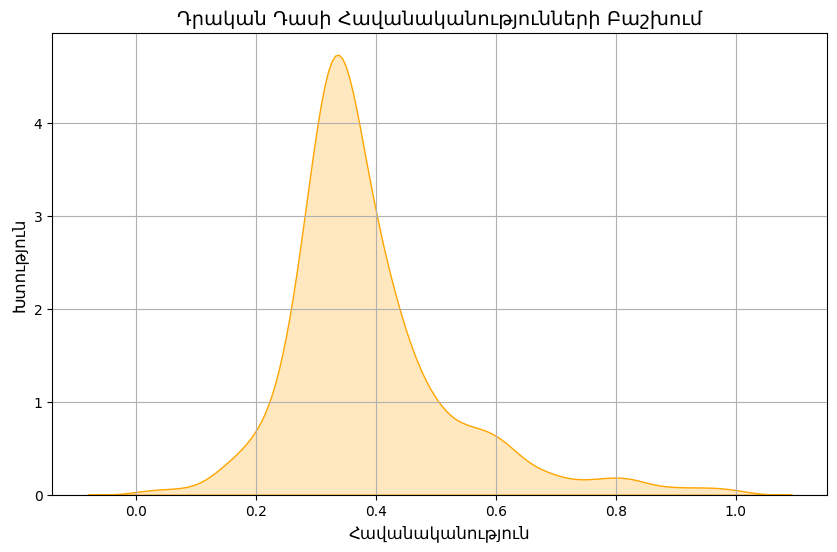

In [56]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (accuracy_score, precision_score, 
                           recall_score, f1_score,
                           confusion_matrix, ConfusionMatrixDisplay,
                           classification_report)
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Մոդելի ստեղծում և ուսուցում
nb = GaussianNB()
nb.fit(X_train, y_train)

# 2. Կանխատեսումներ
y_pred_nb = nb.predict(X_test)

# 3. Մետրիկների հաշվարկ
print("Naive Bayes Մոդելի Գնահատում (%):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb)*100:.2f}%") 
print(f"Precision: {precision_score(y_test, y_pred_nb)*100:.2f}%")
print(f"Recall: {recall_score(y_test, y_pred_nb)*100:.2f}%")
print(f"F1 Score: {f1_score(y_test, y_pred_nb)*100:.2f}%\n")

# 4. Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_nb, 
                          target_names=['Ոչ խմելի', 'Խմելի'],
                          digits=3))

# 5. Confusion Matrix Վիզուալիզացիա
cm = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
           xticklabels=['Կանխ. Ոչ խմելի', 'Կանխ. Խմելի'],
           yticklabels=['Փաստ. Ոչ խմելի', 'Փաստ. Խմելի'])
plt.xlabel('Կանխատեսված Դասեր', fontsize=12)
plt.ylabel('Փաստացի Դասեր', fontsize=12)
plt.savefig('nb_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# 6. Հավանականությունների բաշխման վիզուալիզացիա
plt.figure(figsize=(10,6))
sns.kdeplot(nb.predict_proba(X_test)[:,1], fill=True, color='orange')
plt.title('Դրական Դասի Հավանականությունների Բաշխում', fontsize=14)
plt.xlabel('Հավանականություն', fontsize=12)
plt.ylabel('Խտություն', fontsize=12)
plt.grid(True)
plt.savefig('nb_probabilities.png', dpi=300, bbox_inches='tight')
plt.show()

## Overall Evaluation of the six models

<table ><tr><th>Model</th> 
    <th>Accuracy</th>
    <tr><td> Logistic Regresion </td><td> 61.05%</td></tr>
    <tr><td> K-Nearest neighbors  </td><td> 60.32%</td></tr>
    <tr><td>Support Vector Classifier </td><td> 67.78%</td></tr>
    <tr><td>Naive Bayes </td><td> 61.97%</td></tr>
    <tr><td>Decision tree </td><td>56.41%</td></tr>
    <tr><td>Random Forest </td><td>68.21% </td></tr>
    </table>

    

In [57]:
# Assuming your SVM model is named 'svm' and the feature values are provided in a list
# List of features for prediction
#features = [[5.735724, 158.318741, 25363.016594, 7.728601, 377.543291, 568.304671, 13.626624, 75.952337, 4.732954]]

# Example values for features to predict potability as 1 (safe for drinking)
features = [[0.288593,1.227231,-0.031677,-0.337185,2.039489,-1.571689,1.950835,0.120936,0.353029]]


# Make a prediction
X_SVM = svm.predict(features)

print("The potability of water for the given values is" ,X_SVM)

if X_SVM == 0:
    print("Unsafe Drinking Water!")
else:
    print("Safe Drinking Water!")


The potability of water for the given values is [1]
Safe Drinking Water!


In [58]:
print(X_test,svm.predict(X_test))

[[-0.79973783  0.0590278  -0.09875986 ... -0.3754991   0.50129159
   1.1957874 ]
 [ 1.81090453  0.40736491 -1.26801044 ... -0.11286685 -1.22449534
   2.05882317]
 [ 0.28859329  1.22723099 -0.03167695 ...  1.95083506  0.12093628
   0.35302908]
 ...
 [-0.39582541  1.17248114 -0.38859234 ... -0.05083557 -0.04888012
   0.53393326]
 [-0.02547355  1.01603391 -0.66746608 ... -1.65328003  0.01363603
   0.81272745]
 [-0.23330503  0.99649125 -0.7934036  ... -0.15188729  0.62573835
   0.28669535]] [0 0 1 ... 0 0 0]


In [59]:
pd.set_option('display.max_columns',None)

In [60]:
x_test=pd.DataFrame(X_test)

In [61]:
x_test

,0,1,2,3,4,5,6,7,8
0,-0.799738,0.059028,-0.098760,1.265206,-0.203498,-1.408416,-0.375499,0.501292,1.195787
1,1.810905,0.407365,-1.268010,-0.641700,0.680296,0.286625,-0.112867,-1.224495,2.058823
2,0.288593,1.227231,-0.031677,-0.337185,2.039489,-1.571689,1.950835,0.120936,0.353029
3,-0.422783,-0.183974,0.002380,-0.131146,-0.014799,-0.894764,-0.643028,0.051050,-0.694280
4,0.266948,0.500279,-0.608450,-1.065180,0.912963,-0.832745,-2.464209,-1.252702,1.313516
...,...,...,...,...,...,...,...,...,...
1633,1.429698,2.592408,2.947201,0.763183,-0.520904,-0.048098,-1.304801,-0.148211,-1.290720
1634,-0.025474,-1.318167,0.740360,0.823342,-0.014799,-0.988643,0.258093,-1.143013,-0.174175
1635,-0.395825,1.172481,-0.388592,0.946664,-0.871016,0.196742,-0.050836,-0.048880,0.533933
1636,-0.025474,1.016034,-0.667466,-1.382711,-0.014799,0.280169,-1.653280,0.013636,0.812727


In [62]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.073546,392.449580,19.903225,66.622485,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.073546,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.073546,402.883113,11.168946,77.488213,4.708658,1


In [63]:
import joblib 
joblib.dump(svm, "svm.pkl")

['svm.pkl']